In [12]:
import re
pattern = re.compile(".pdb")
pattern_2 = re.compile("PC-score")

for i, line in enumerate(open('output')):
    for match in re.finditer(pattern, line):
        #print ('Found on line %s: %s' % (i+1, match.group()))
        print (line)
    for match in re.finditer(pattern_2, line):
        #print ('Found on line %s: %s' % (i+1, match.group()))
        print (line)
    

mtrb_regx.pdb narsl.pdb

mtrb_regx.pdb narsl.pdb

PC-score is 0.46337

mtrb_regx.pdb TcrXY.pdb

mtrb_regx.pdb TcrXY.pdb

PC-score is 0.62703

mtrb_regx.pdb TcrY_mtrA.pdb

mtrb_regx.pdb TcrY_mtrA.pdb

PC-score is 0.60209

mtrb_regx.pdb mtrb_narl.pdb

mtrb_regx.pdb mtrb_narl.pdb

PC-score is 0.58162

mtrb_regx.pdb TcrX_mtrB.pdb

mtrb_regx.pdb TcrX_mtrB.pdb

PC-score is 0.67728

mtrb_regx.pdb senx3_regx3.pdb

mtrb_regx.pdb senx3_regx3.pdb

  B    241    GLU  ---------------  mtrb_regx.pdb mtrb_pdta.pdb

  B    241    GLU  ---------------  mtrb_regx.pdb mtrb_pdta.pdb

PC-score is 0.63362

mtrb_regx.pdb mtr_ab_final.pdb

mtrb_regx.pdb mtr_ab_final.pdb

PC-score is 0.67987

mtrb_regx.pdb senx_mtra.pdb

mtrb_regx.pdb senx_mtra.pdb

PC-score is 0.48794

mtrb_regx.pdb mtra_nars.pdb

mtrb_regx.pdb mtra_nars.pdb

PC-score is 0.54036

narsl.pdb TcrXY.pdb

narsl.pdb TcrXY.pdb

PC-score is 0.38221

narsl.pdb TcrY_mtrA.pdb

narsl.pdb TcrY_mtrA.pdb

PC-score is 0.39503

narsl.pdb mtrb_narl.pdb

narsl.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

df_id_rr = pd.DataFrame()
df_id_rr = pd.read_csv('pcalign_res.csv')
df_id_rr = df_id_rr.set_index('Complexes')

In [4]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


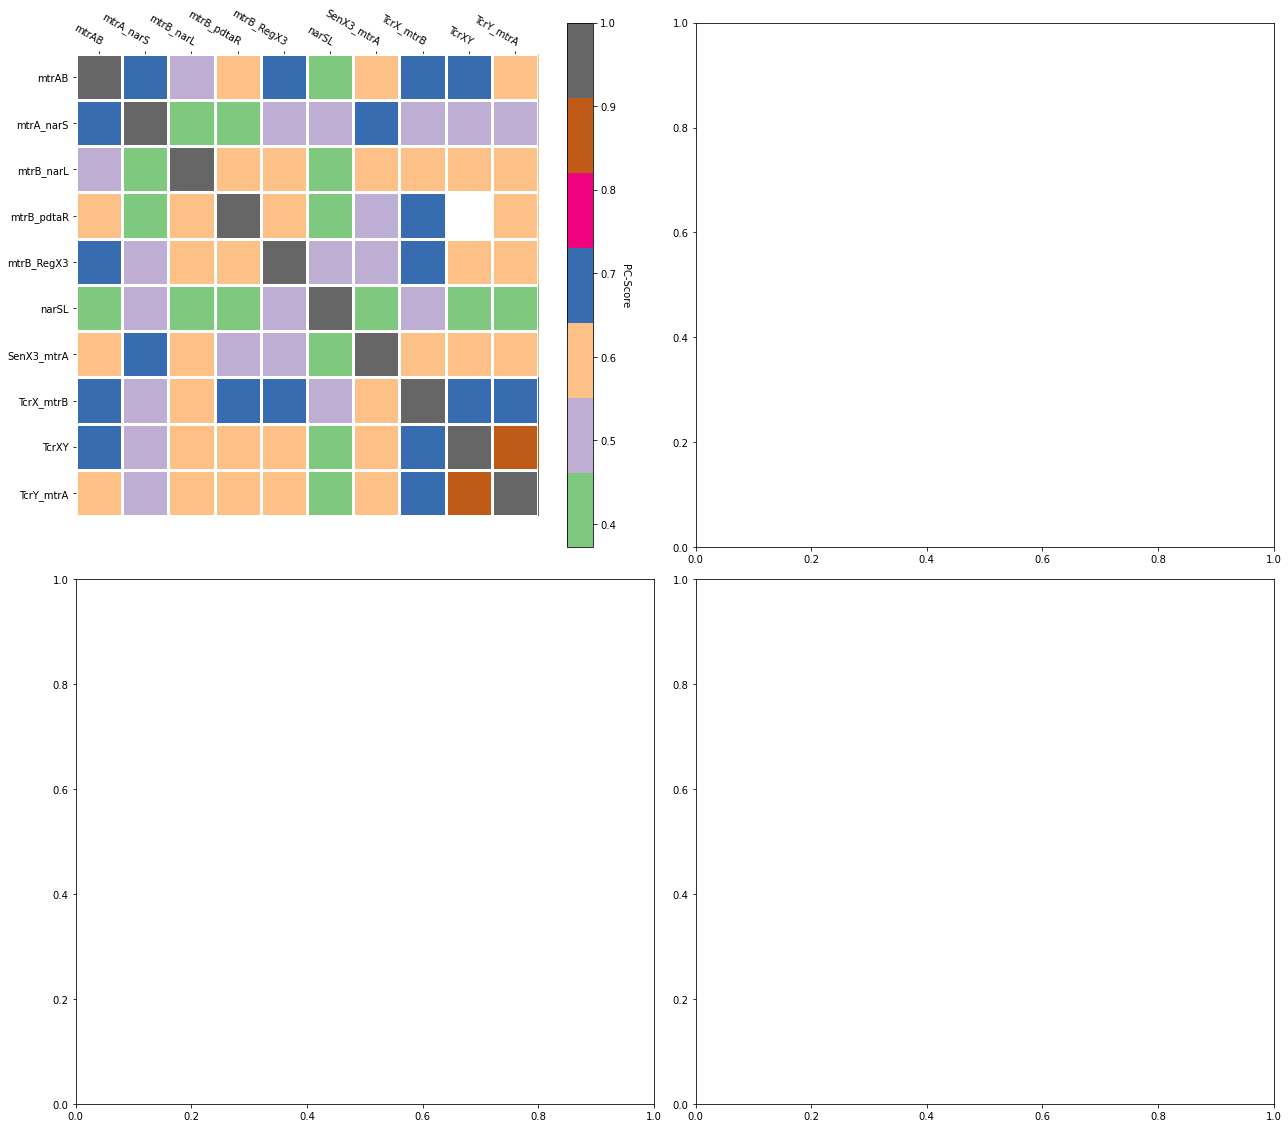

In [23]:
#r_hk = df_id_hk.select_dtypes(['number']).columns
r_rr = df_id_rr.select_dtypes(['number']).columns

fig, ((ax, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 16))

# Replicate the above example with a different font size and colormap.

#im, _ = heatmap(df_id_hk, r_hk,r_hk,ax=ax,
                #cmap=plt.get_cmap("PiYG", 7), cbarlabel="Percentage %")
#annotate_heatmap(im, valfmt="{x:.1f}", size=7)

# Create some new data, give further arguments to imshow (vmin),
# use an integer format on the annotations and provide some colors.

#data = np.random.randint(2, 100, size=(7, 7))
#y = ["Book {}".format(i) for i in range(1, 8)]
#x = ["Store {}".format(i) for i in list("ABCDEFG")]
#im, _ = heatmap(df_rmsd_hk,r_hk,r_hk, ax=ax2, vmin=0,
                #cmap="PuOr", cbarlabel="Pairwise phylogenetic distance")
#annotate_heatmap(im, valfmt="{x:.1f}", size=7, threshold=20,
                 #textcolors=["red", "white"])

# Sometimes even the data itself is categorical. Here we use a
# :class:`matplotlib.colors.BoundaryNorm` to get the data into classes
# and use this to colorize the plot, but also to obtain the class
# labels from an array of classes.

#data = np.random.randn(6, 6)
#y = ["Prod. {}".format(i) for i in range(10, 70, 10)]
#x = ["Cycle {}".format(i) for i in range(1, 7)]

#qrates = np.array(list("ABCDEFG"))
#norm = matplotlib.colors.BoundaryNorm(np.linspace(-3.5, 3.5, 8), 7)
#fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: qrates[::-1][norm(x)])
#fig = ax
im, _ = heatmap(df_id_rr,r_rr,r_rr,ax=ax,
                #cmap=plt.get_cmap("PiYG", 7),
                cmap=plt.get_cmap("Accent", 7), cbarlabel="PC-Score")
                #cbar_kw=dict(ticks=np.arange(-3, 4)),
                #cbarlabel="%")

#annotate_heatmap(im,valfmt="{x:.1f}" , size=9, threshold=-1,
                 #textcolors=["red", "black"])

# We can nicely plot a correlation matrix. Since this is bound by -1 and 1,
# we use those as vmin and vmax. We may also remove leading zeros and hide
# the diagonal elements (which are all 1) by using a
# :class:`matplotlib.ticker.FuncFormatter`.

#corr_matrix = np.corrcoef(np.random.rand(6, 5))
#im, _ = heatmap(df_rmsd_rr,r_rr,r_rr, ax=ax4,cmap="PuOr",cbarlabel="Pairwise phylogenetic distance")


#def func(x, pos):
#    return "{:.2f}".format(x).replace("0.", ".").replace("1.00", "")

#annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func), size=7)


plt.tight_layout()

#plt.savefig("PC-Score.png", dpi=1500)
plt.show()

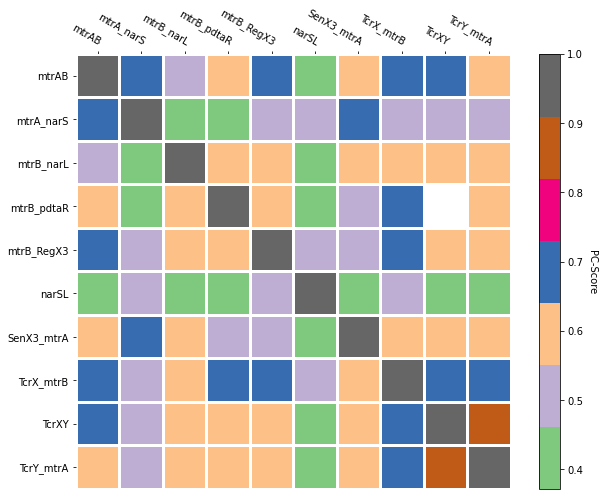

In [31]:
plt.figure(figsize=(10,8))
heatmap(df_id_rr,r_rr,r_rr,cmap=plt.get_cmap("Accent", 7), cbarlabel="PC-Score")
plt.savefig("PC-Score.png", dpi=600)